In [2]:
import requests
import json
from pprint import pprint
from config import api_key

import matplotlib.pyplot as plt

In [3]:
# Imports for calculations
import pandas as pd
import numpy as np

In [4]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
merged_data_df = pd.read_csv("Output/merged_data.csv")

# Display sample data
merged_data_df.head()

,Unnamed: 0,ori,agency_name,agency_id,state_name,state_abbr,division_name,region_name,region_desc,county_name,agency_type_name,nibrs,nibrs_start_date,latitude,longitude,data_year,offense,cleared,actual
0,0,NC0010000,Alamance County Sheriff's Office,10873,North Carolina,NC,South Atlantic,South,Region III,ALAMANCE,County,True,2019-01-01T00:00:00.000Z,36.041974,-79.399935,2013,violent-crime,84,109
1,1,NC0010000,Alamance County Sheriff's Office,10873,North Carolina,NC,South Atlantic,South,Region III,ALAMANCE,County,True,2019-01-01T00:00:00.000Z,36.041974,-79.399935,2014,violent-crime,81,123
2,2,NC0010000,Alamance County Sheriff's Office,10873,North Carolina,NC,South Atlantic,South,Region III,ALAMANCE,County,True,2019-01-01T00:00:00.000Z,36.041974,-79.399935,2015,violent-crime,97,114
3,3,NC0010000,Alamance County Sheriff's Office,10873,North Carolina,NC,South Atlantic,South,Region III,ALAMANCE,County,True,2019-01-01T00:00:00.000Z,36.041974,-79.399935,2016,violent-crime,77,95
4,4,NC0010000,Alamance County Sheriff's Office,10873,North Carolina,NC,South Atlantic,South,Region III,ALAMANCE,County,True,2019-01-01T00:00:00.000Z,36.041974,-79.399935,2017,violent-crime,34,46


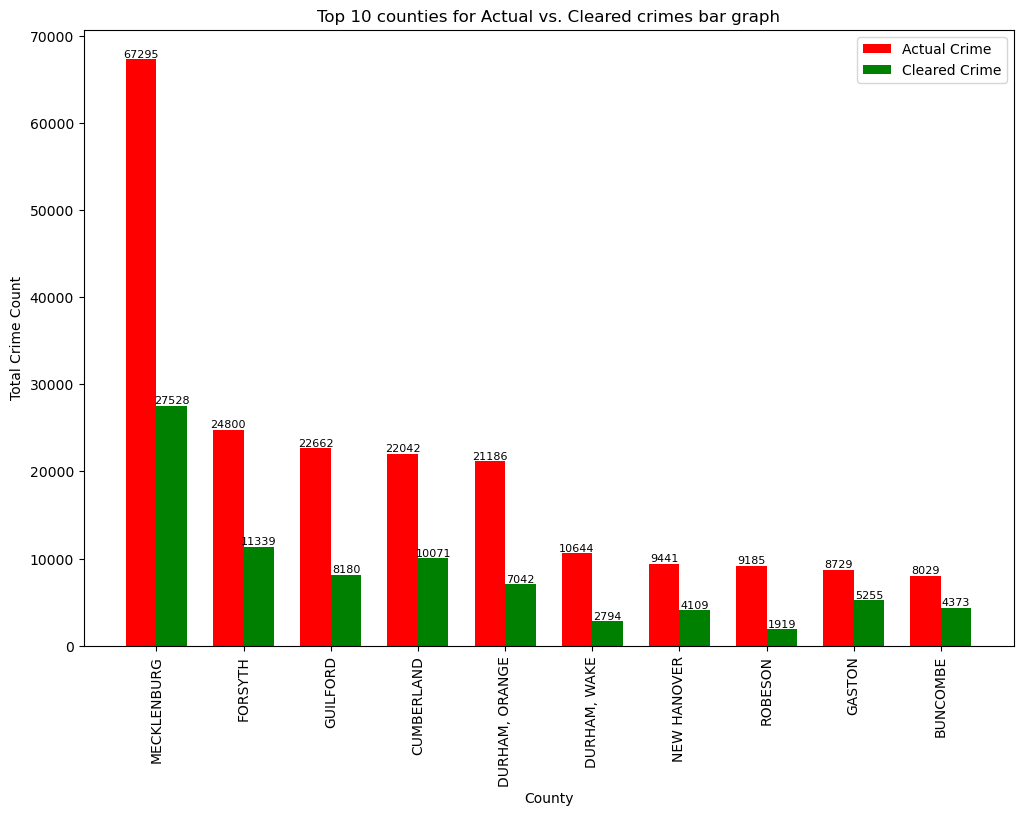

In [12]:
#Find the sum of violent crime(actual and cleared) for each county
grouped_data_bycounty = merged_data_df.groupby('county_name').agg({'actual': 'sum', 'cleared': 'sum'}).reset_index()

# Sort the DataFrame by total actual and cleared crimes in descending order(for taking top10)
sorted_data_bycounty = grouped_data_bycounty.sort_values(by=['actual', 'cleared'], ascending=[False, False])

# Plotting the top 10 counties by actual and cleared crimes
plt.figure(figsize=(12, 8))

bar_width = 0.35
index = np.arange(10)

bar_actual = plt.bar(index, sorted_data_bycounty['actual'][:10], bar_width, label='Actual Crime', color='red') #For actual number of crimes
bar_cleared = plt.bar(index + bar_width, sorted_data_bycounty['cleared'][:10], bar_width, label='Cleared Crime', color='green') #For cleared number of crimes

#For showing values for each bar
for bar in bar_actual + bar_cleared:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.0f}',
             ha='center', va='bottom', fontsize=8)

x_axis = sorted_data_bycounty['county_name'][:10].tolist()
plt.xticks(index + bar_width/2, x_axis, rotation = 90)

plt.xlabel('County')
plt.ylabel('Total Crime Count')
plt.title('Top 10 counties for Actual vs. Cleared crimes bar graph')
plt.legend()

plt.savefig("Output/counties_bar.png")
plt.show()

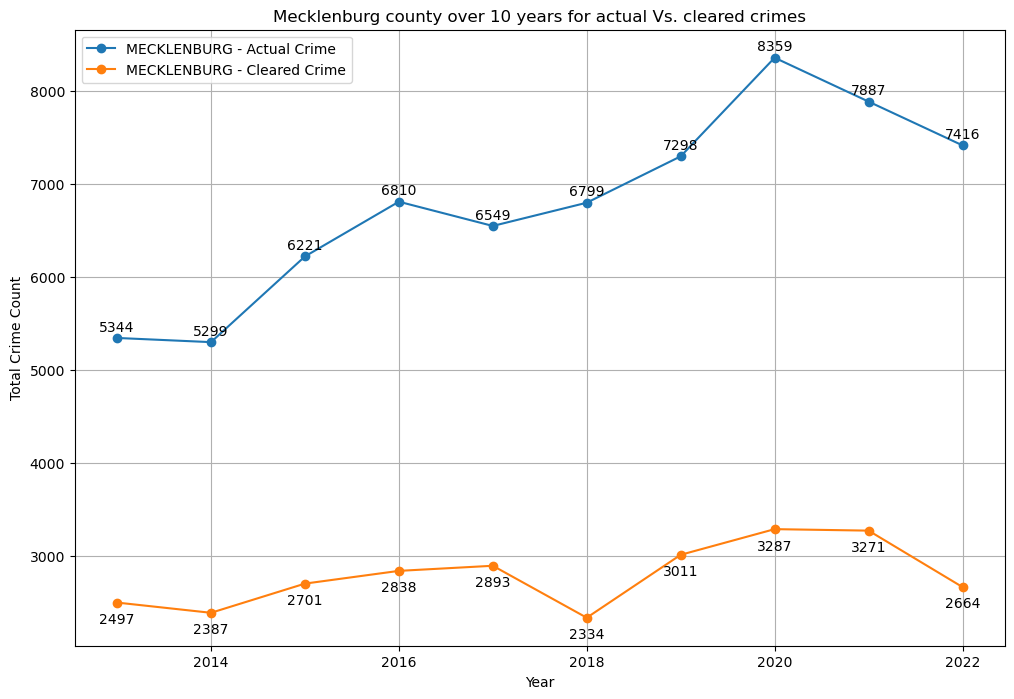

In [13]:
#Selected the 3 differnt values for the highest crimed county
selected_counties = ["MECKLENBURG", "MECKLENBURG, UNION", "IREDELL, MECKLENBURG"]

# Filter the data for the selected counties
selected_counties_data = merged_data_df[merged_data_df['county_name'].isin(selected_counties)]

# Group the data by 'data_year' and sum the values for each year
grouped_data = selected_counties_data.groupby('data_year').agg({'actual': 'sum', 'cleared': 'sum'}).reset_index()

# Plotting the line chart for the combined data over 10 years (both actual and cleared crimes)
plt.figure(figsize=(12, 8))

# Plotting the line for actual crimes
plt.plot(grouped_data['data_year'], grouped_data['actual'], marker='o', label='MECKLENBURG - Actual Crime')

# Annotate each point with the count for actual crimes
for i, count in enumerate(grouped_data['actual']):
    plt.annotate(f'{count:.0f}', (grouped_data['data_year'].iloc[i], count), textcoords="offset points", xytext=(0, 5), ha='center')

# Plotting the line for cleared crimes
plt.plot(grouped_data['data_year'], grouped_data['cleared'], marker='o', label='MECKLENBURG - Cleared Crime')

# Annotate each point with the count for cleared crimes
for i, count in enumerate(grouped_data['cleared']):
    plt.annotate(f'{count:.0f}', (grouped_data['data_year'].iloc[i], count), textcoords="offset points", xytext=(0, -15), ha='center')

plt.xlabel('Year')
plt.ylabel('Total Crime Count')
plt.title('Mecklenburg county over 10 years for actual Vs. cleared crimes')
plt.legend()
plt.grid(True)
plt.savefig("Output/highest_county_line.png")
plt.show()